# Cosmology assignment 3
Brittany Howard

In [31]:
import numpy as np
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM, z_at_value
import matplotlib.pyplot as plt

%matplotlib inline

## Question 1

You are conducting an imaging survey that covers four 1 deg$^2$ fields to a V -band magnitude limit of 22. 
* To what redshift can you observe Cepheid variable stars? 
* To what redshift can you observe type Ia supernovae? 
* Assuming that the SNeIa rate is 1 supernova per galaxy per century, what is the observed rate of supernova explosions in your survey? 
* You may assume the following: $L_{Cepheid} = 4×10^4 L_⊙$; $L_{SNeIa} = 4×10^9 L_⊙$; $M_{⊙,V} = 4.83$; $φ_{gal} = 1×10^{−2} Mpc^{−3}$; evolutionary and k-corrections may be ignored. The cosmological model is described by a matter-dominated Einstein-de Sitter model.

In [107]:
# define given values
L_sun =   3.828 * 10**26      # solar luminosity in watts
m_lim = 22.                   # v band magnitude limit (the faintest, so numerically this is the upper limit)
L_cepheid = 4 * 10**4         # cepheid luminosity in units of solar luminosity
L_sne = 4 * 10**9             # SneIa luminosity in units of solar luminosity
M_sun = 4.83                  # absolute magnitude of sun in v-band
phi_gal = 10**(-2)            # numner density of galaxies per cubic Mpc

# not given in assignment, but needed
c = 3 * 10**5                 # speed of light, km/s
H_0 = 70                      # Hubble constant, km s^-1 Mpc^-1

* To what redshift can we observe cepheids?

We can use the distance modulus (ignoring the k and E terms):
$ m_{limit} = M_{cepheid} + 5\log\bigg(\frac{d}{10\text{pc}}\bigg)$, 

and 

$d\text{(pc)} = 10 ^{\frac{m_{limit}-M_{cepheid}}{5} + 1}$.

We know $m_{limit}$ and we can relate distance to redshift, so we can replace $d$ with $z$. How, then, do we get $M_{cepheid}$? It comes from the luminosity:

$M_{cepheid} = -2.5\log\bigg(\frac{L_{cepheid}}{L_\odot}\bigg)+M_\odot$.

Okay, all that's left is how to relate distance to redshift. Since we are talking about luminosities and magnitudes, it makes sense to use luminosity distance instead of angular distance. Luminosity distance is defined as:

$d_L(z) = \frac{2c}{H_0}(1+z)\bigg[1-\frac{1}{\sqrt{1+z}}\bigg]$.

Solving for z is not easy since this is an implicit function.

In [108]:
def get_M(L, M_sun):
    return(-2.5 * np.log10(L) + M_sun)  # L_cepheid is in units of L_sun

def get_dL(m_lim, M):  # in parsecs
    return(10 ** (((m_lim-M) / 5) + 1))

In [109]:
# get M_cepheid and dL_cepheid 
M_cepheid = get_M(L_cepheid, M_sun)
dL_cepheid = get_dL(m_lim, M_cepheid)
print(M_cepheid, dL_cepheid)

-6.67514997832 5432878.53768


In [110]:
# solve for z
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=1)

In [111]:
z_sne = z_at_value(cosmo.luminosity_distance, dL_cepheid * u.pc)
print('We can observe cepheids in the v-band to a redshift of z = {}'.format(z_cepheid))

We can observe cepheids in the v-band to a redshift of z = 0.0008718494200259247


* To what redshift can we observe SneIa? 

In [112]:
# get M_sne and dL_sne
M_sne = get_M(L_sne, M_sun)
dL_sne = get_dL(m_lim, M_sne)
print(M_sne, dL_sne)

-19.1751499783 1718027043.01


In [113]:
# solve for z
z_sne = z_at_value(cosmo.luminosity_distance, dL_sne * u.pc)
print('We can observe SneIa in the v-band to a redshift of z = {}'.format(z_sne))

We can observe SneIa in the v-band to a redshift of z = 0.37183198683935714


* Assuming that the SNeIa rate is 1 supernova per galaxy per century, what is the observed rate of supernova explosions in your survey? 

In [270]:
# first off, what volume is enclosed? Think of this as a chunk of a fairly thick redshift shell
volume = 1./41253. *  (cosmo.comoving_volume(z_sne) - cosmo.comoving_volume(0))
print('Volume enclosed in survey is {}'.format(volume))

# number density of galaxies in our universe is ~0.1 gal Mpc^-3
phi_gal = 0.1
num_gal = volume.value * phi_gal
print('Number of galaxies in survey is {}'.format(num_gal))

# sne rate is 1/century = 3.154e-9 s^-1 gal^-1
sne_rate = 3.154 * 10**-9

# rate of sne in survey is num_gal * sne_rate
print('Observed rate of Sne1a is {} per second'.format(num_gal * sne_rate))
print('corresponding to one Sne1a explosion every ~{} seconds'.format(1/(num_gal*sne_rate)))

Volume enclosed in survey is 199443.68533660925 Mpc3
Number of galaxies in survey is 19944.368533660927
Observed rate of Sne1a is 6.290453835516656e-05 per second
corresponding to one Sne1a explosion every ~15897.104185931388 seconds


## Question 2
* Produce a computer plot of the r-band apparent magnitude evolution of a SN Ia versus redshift in two different model universes: matter-dominated EdS and an empty universe. You may assume that the absolute magnitude at peak brightness of a SNeIa is $r = −19.2$ and does not evolve with redshift. In order to compute the applicable k-correction you can download a SN Ia spectrum and a generic r-band filter response from the course web site.

* Plot the rest-frame spectrum with the filter overlaid to check that all is well.

* As a test of your method, produce individual plots of the distance modulus (i.e. distance dimming) and the k-correction – both in units of magnitudes – for each model universe.

* What is the difference in magnitude between a SN Ia in each universe at $z = 0.5$? Consider the effects of both distance dimming and k-correction in your answer.


This will require the cosmological distance modulus:

$m_\lambda(z) = M_\lambda+25+5\log[d_L(z)]+K_\lambda(z)+E_\lambda(z)$.

And we are assuming that $E(z)=0$.

In [57]:
M_sne = -19.2  # r-band absolute magnitude of sneIa at peak brightness; constant with redshift

In [80]:
# load assignment data
sdss_data = np.loadtxt('data_assignment3/sdss_r.dat')
sne_data = np.loadtxt('data_assignment3/sn1a_15.dat')

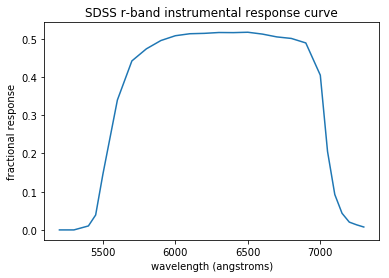

In [258]:
# what does the data look like?
plt.plot(sdss_data[:,0], sdss_data[:,1], label='instrumental response')
plt.xlabel('wavelength (angstroms)')
plt.ylabel('fractional response')
plt.title('SDSS r-band instrumental response curve')

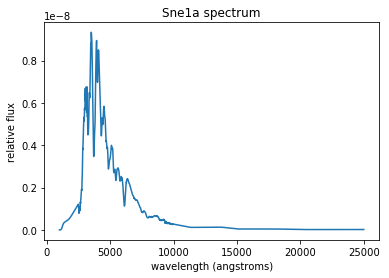

In [245]:
plt.plot(sne_data[:,0], sne_data[:,1])
plt.xlabel('wavelength (angstroms)')
plt.ylabel('relative flux')
plt.title('Sne1a spectrum')

### Plot rest frame spectra with filter overlaid

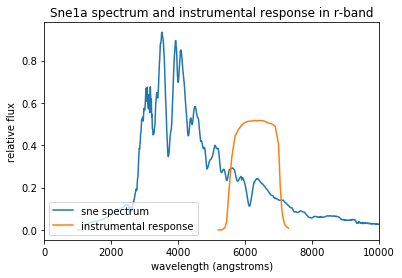

In [257]:
plt.plot(sne_data[:,0], sne_data[:,1]*10**8, label='sne spectrum')  
# is it okay to scale it like this? Qualitatively, it gets the idea across.
plt.plot(sdss_data[:,0], sdss_data[:,1], label='instrumental response')
plt.xlabel('wavelength (angstroms)')
plt.ylabel('relative flux')
plt.xlim((0, 10000))
plt.title('Sne1a spectrum and instrumental response in r-band')
plt.legend(loc='lower left')

Not the best filter to use, probably...

### Interpolate and make k-corrections

In [224]:
# interpolate the S and R curves so I can find the k-corrections
z_range = np.linspace(0,12,1500)
wavelength_range = np.linspace(np.min(sne_data[:,0]), 25000, 150)

def r_interp(wavelength, sdss_data=sdss_data):
    return(np.interp(wavelength, sdss_data[:,0], sdss_data[:,1]))

def s_interp(wavelength, sne_data=sne_data):
    return(np.interp(wavelength, sne_data[:,0], sne_data[:,1]))

K-corrections are defined as:

$K_\lambda(z) = 2.5\log(1+z)-2.5\log\bigg(\frac{\int_0^\infty S(\lambda/(1+z))R(\lambda)d\lambda}{\int_0^\infty S(\lambda)R(\lambda)d\lambda}\bigg)$

In [225]:
def get_k(z, s_interp, r_interp):
    top = 0
    bottom = 0
    for wavelength in wavelength_range:
        top += s_interp(wavelength/(1+z)) * r_interp(wavelength)
        bottom += s_interp(wavelength) * r_interp(wavelength)
    return(2.5 * np.log10(1+z) -2.5 * np.log10(top/bottom))

In [226]:
empty_cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0)


def get_dL(z, cosmo, c=c, H_0=H_0):
    if cosmo == 'eds':
        return(((2*c) / H_0) * (1+z) * (1 - 1/np.sqrt(1+z)))

    elif cosmo == 'empty':
        # easier than re-deriving luminosity distance
        return(empty_cosmo.luminosity_distance(z).value * 10**(-6))
        
    else:
        print('Not a valid cosmology, STOPPPPPP')

In [227]:
def get_m(M_sne, z, cosmo):
    return(M_sne + 25 + 5 * np.log10(get_dL(z, cosmo)) + get_k(z, s_interp, r_interp))

### Plot SneIa apparent magnitude vs. redshift

In [228]:
# calculate apparent magnitudes
m_eds = []
m_empty = []
for z in z_range:
    m_eds.append(get_m(M_sne, z, cosmo='eds'))
    m_empty.append(get_m(M_sne, z, cosmo='empty'))

/Users/brittanyhoward/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


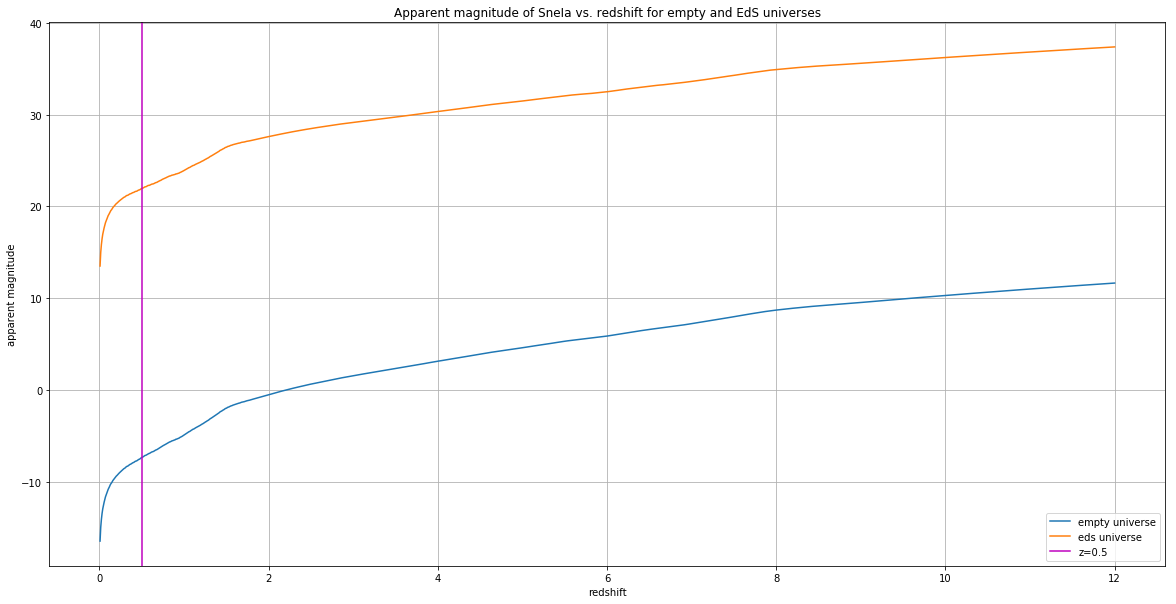

In [241]:
# plot them on the same graph to compare
plt.figure(figsize=(20,10))
plt.plot(z_range, m_empty, label='empty universe')
plt.plot(z_range, m_eds, label='eds universe')
plt.xlabel('redshift')
plt.ylabel('apparent magnitude')
plt.axvline(0.5, c='m', label='z=0.5')
plt.grid()
plt.title('Apparent magnitude of SneIa vs. redshift for empty and EdS universes')
plt.legend()

At a redshift of 0.5, the apparent magnitude of a SneIa would be about -7 for an empty universe and about 22 for an EdS universe.

In [259]:
# what are the exact values?
empty_mag = np.interp(0.5, z_range, m_empty)
eds_mag = np.interp(0.5, z_range, m_eds)
print('m = {} for an empty universe and {} for an eds universe'.format(empty_mag, eds_mag))

m = -7.380668336788991 for an empty universe and 21.94951220462978 for an eds universe


### Plot distance modulus vs redshift

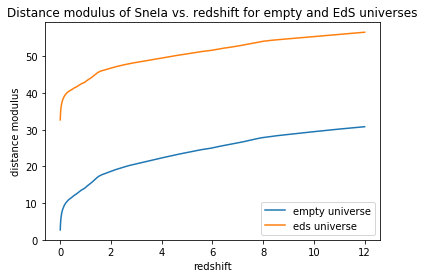

In [243]:
# plot them on the same graph to compare
plt.plot(z_range, m_empty-M_sne, label='empty universe')
plt.plot(z_range, m_eds-M_sne, label='eds universe')
plt.xlabel('redshift')
plt.ylabel('distance modulus')
plt.title('Distance modulus of SneIa vs. redshift for empty and EdS universes')
plt.legend()

### Plot k-correction vs redshift

In [231]:
# calculate k
k = []  # will be the same for both universes
for z in z_range:
    k.append(get_k(z, s_interp, r_interp))

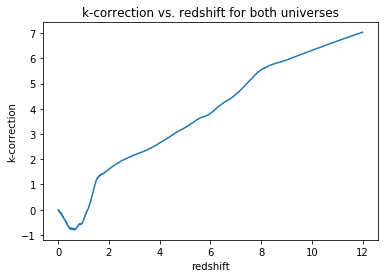

In [232]:
# plot them on the same graph to compare
plt.plot(z_range, k)
plt.xlabel('redshift')
plt.ylabel('k-correction')
plt.title('k-correction vs. redshift for both universes')

What a weird shape.